In [1]:
import math  
import matplotlib.pyplot as plt

In [2]:
class point(object):
    def __init__(self, x,y):
        self.x=x
        self.y=y
        
    def getX(self):
        # Getter method for a Coordinate object's x coordinate.
        # Getter methods are better practice than just accessing an attribute directly
        return self.x

    def getY(self):
        # Getter method for a Coordinate object's y coordinate
        return self.y

    def __str__(self):
        return '<' + str(self.getX()) + ',' + str(self.getY()) + '>'
    
    def __eq__(self, other):
        return self.y == other.y and self.x == other.x
    
    def __repr__(self):
        return "Coordinate(%3.3f, %3.3f)" % (self.x, self.y)
    
    def distance(self, other):
        dx = self.x - other.x
        dy = self.y - other.y
        return math.sqrt(dx**2 + dy**2)
    
    def __add__(self,other):
        sum_x=self.x + other.x
        sum_y=self.y + other.y
        return point(sum_x,sum_y)
    
    def __sub__(self,other):
        dx=self.x - other.x
        dy=self.y - other.y
        return point(dx,dy)
    
    def scale(self,constant):
        return point(self.x*constant,self.y*constant)
    
    def __mul__(self,other):
        return self.x*other.x+self.y*other.y

In [3]:
def deviation_term(old,new,alpha):
    cost=0
    for i in range(1,len(old)-1):
        cost+=point.distance(old[i],new[i])**2
    return alpha*cost

In [4]:
def curvature_term(new,beta):
    cost=0
    for i in range(1,len(new)-1):
        cost+=(new[i+1]-new[i])*(new[i]-new[i-1])/(point.distance(new[i+1],new[i]))/(point.distance(new[i],new[i-1]))
    return -1*beta*cost

In [5]:
def estimate_gradient(old, new, alpha, beta,epsilon):
    
    gradient=[point(0,0)]
    
    for i in range(1,len(new)-1):
        
        new[i]=new[i]+point(epsilon,0)
        up_cost=deviation_term(old,new,alpha)+curvature_term(new,beta)
        new[i]=new[i]+point(-2*epsilon,0)
        down_cost=deviation_term(old,new,alpha)+curvature_term(new,beta)
        gradient_x = (up_cost-down_cost) / 2 / epsilon
        
        
        new[i]=new[i]+point(epsilon,epsilon)
        up_cost=deviation_term(old,new,alpha)+curvature_term(new,beta)
        new[i]=new[i]+point(0,-2*epsilon)
        down_cost=deviation_term(old,new,alpha)+curvature_term(new,beta)
        gradient_y = (up_cost-down_cost) / 2 / epsilon
        
        gradient.append(point(gradient_x,gradient_y))
    
    gradient.append(point(0,0))
    
    return gradient

In [6]:
def smoothing(points,alpha=1,beta=5,epsilon=0.000001,step=0.001,max_iteration=500,stop_error=6e-4):

    old=points.copy()
    new=points.copy()
    old_cost = 1.0
    new_cost = 0.0
    
    i=0
    
    while abs(new_cost-old_cost) > stop_error and i <= max_iteration:
        
        i+=1
        print("iteration: %d/%d | Error: %1.8f" %(i,max_iteration,new_cost-old_cost))
        
        old_cost=new_cost
        new_cost=deviation_term(old,new,alpha)+curvature_term(new,beta)

        gradient = estimate_gradient(old, new, alpha, beta, epsilon)
        for j in range(len(new)):
            new[j]-=point.scale(gradient[j],step)
        
    return new

Other useful functions

In [21]:
def add_points(old_x,old_y,dy=1):
    
    original_plus=[point(old_x[0],old_y[0])]
    
    for i in range(0,len(old_x)-1):
        z=(old_y[i+1] - old_y[i]) //dy
        if z==0:
            z=(old_x[i+1] - old_x[i]) //dy
    
        a_dx=(old_x[i+1] - old_x[i]) / z
        a_dy=(old_y[i+1] - old_y[i]) /z
        
        for y in range(1,int(z+1)):
            original_plus.append(point(old_x[i]+a_dx*y, old_y[i]+a_dy*y))
            
    return original_plus

In [22]:
def xy_to_points(old_x,old_y):
    original = []
    for i in range(len(original_x)):
        original.append(point(old_x[i],old_y[i]))
    return original

In [23]:
def points_to_xy(original):
    x=[]
    y=[]
    for i in range(len(original)):
        x.append(point.getX(original[i]))
        y.append(point.getY(original[i]))
    return [x,y]

Testing

In [24]:
old_y=[2, 6, 10, 14, 18, 22, 30, 34, 38, 42, 42, 42, 42, 42, 42]
old_x=[2, 2, 2, 2, 2, 2,6, 6, 6, 6, 10, 14, 18, 22, 26]

left_x=[0, 0, 0, 0, 0, 0, 0, 0, 0,4, 4, 4, 4, 8, 12, 16, 20, 24, 28]
left_y=[0, 4, 8, 12, 16, 20, 24, 28, 32,32, 36, 40, 44, 44, 44, 44, 44, 44, 44]

right_x=[4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8, 8, 12, 16, 20, 24, 28]
right_y=[0, 4, 8, 12, 16, 20, 20, 24, 28, 32, 36, 40, 40, 40, 40, 40, 40]

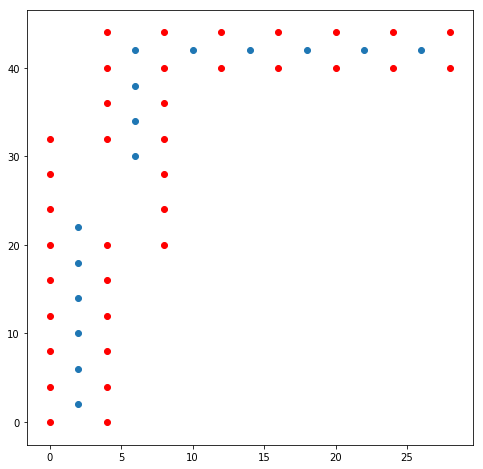

In [25]:
plt.figure(figsize=(8,8))
plt.scatter(old_x,old_y)
plt.scatter(left_x, left_y, c='r')
plt.scatter(right_x, right_y, c='r')

In [26]:
original_plus=add_points(old_x,old_y)
left_plus=add_points(left_x,left_y)
right_plus=add_points(right_x,right_y)

x_plus=points_to_xy(original_plus)[0]
y_plus=points_to_xy(original_plus)[1]

left_x_plus=points_to_xy(left_plus)[0]
left_y_plus=points_to_xy(left_plus)[1]

right_x_plus=points_to_xy(right_plus)[0]
right_y_plus=points_to_xy(right_plus)[1]

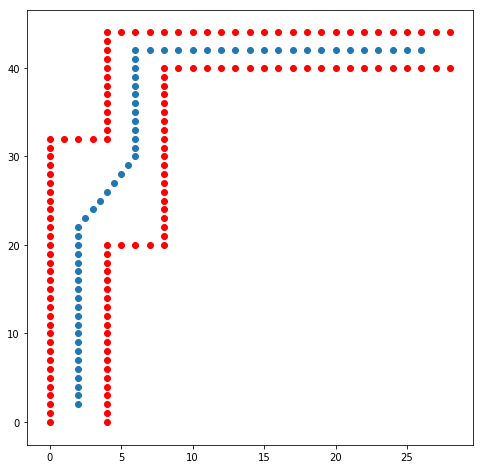

In [27]:
plt.figure(figsize=(8,8))
plt.scatter(x_plus,y_plus)
plt.scatter(left_x_plus, left_y_plus, c='r')
plt.scatter(right_x_plus, right_y_plus, c='r')

In [28]:
new=smoothing(original_plus,beta=70,stop_error=1e-2,step=0.0001,max_iteration=300)

iteration: 1/300 | Error: -1.00000000
iteration: 2/300 | Error: -4045.21980674
iteration: 3/300 | Error: -2.92422960
iteration: 4/300 | Error: -2.71755913
iteration: 5/300 | Error: -2.53360272
iteration: 6/300 | Error: -2.36914021
iteration: 7/300 | Error: -2.22138011
iteration: 8/300 | Error: -2.08791553
iteration: 9/300 | Error: -1.96668195
iteration: 10/300 | Error: -1.85591789
iteration: 11/300 | Error: -1.75412854
iteration: 12/300 | Error: -1.66005265
iteration: 13/300 | Error: -1.57263253
iteration: 14/300 | Error: -1.49098696
iteration: 15/300 | Error: -1.41438695
iteration: 16/300 | Error: -1.34223389
iteration: 17/300 | Error: -1.27404007
iteration: 18/300 | Error: -1.20941133
iteration: 19/300 | Error: -1.14803147
iteration: 20/300 | Error: -1.08964859
iteration: 21/300 | Error: -1.03406286
iteration: 22/300 | Error: -0.98111600
iteration: 23/300 | Error: -0.93068194
iteration: 24/300 | Error: -0.88265902
iteration: 25/300 | Error: -0.83696323
iteration: 26/300 | Error: -0.7

iteration: 210/300 | Error: -0.02839559
iteration: 211/300 | Error: -0.02820563
iteration: 212/300 | Error: -0.02801780
iteration: 213/300 | Error: -0.02783208
iteration: 214/300 | Error: -0.02764843
iteration: 215/300 | Error: -0.02746681
iteration: 216/300 | Error: -0.02728719
iteration: 217/300 | Error: -0.02710954
iteration: 218/300 | Error: -0.02693383
iteration: 219/300 | Error: -0.02676001
iteration: 220/300 | Error: -0.02658807
iteration: 221/300 | Error: -0.02641798
iteration: 222/300 | Error: -0.02624970
iteration: 223/300 | Error: -0.02608320
iteration: 224/300 | Error: -0.02591845
iteration: 225/300 | Error: -0.02575544
iteration: 226/300 | Error: -0.02559412
iteration: 227/300 | Error: -0.02543448
iteration: 228/300 | Error: -0.02527649
iteration: 229/300 | Error: -0.02512012
iteration: 230/300 | Error: -0.02496535
iteration: 231/300 | Error: -0.02481215
iteration: 232/300 | Error: -0.02466050
iteration: 233/300 | Error: -0.02451038
iteration: 234/300 | Error: -0.02436176


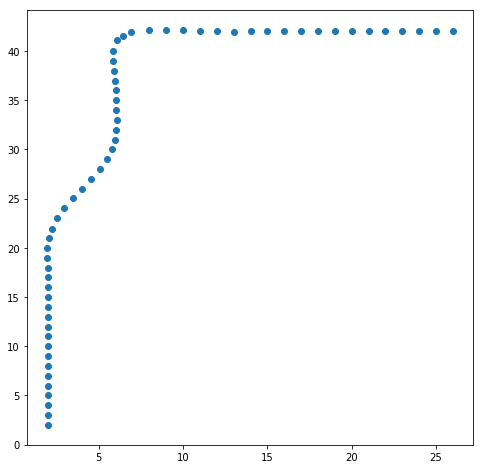

In [29]:
x_plus=points_to_xy(new)[0]
y_plus=points_to_xy(new)[1]
plt.figure(figsize=(8,8))
plt.scatter(x_plus,y_plus)